In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import svm
import seaborn as sns


In [4]:
data = pd.read_csv('muffins.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
Type             20 non-null object
Flour            20 non-null int64
Milk             20 non-null int64
Sugar            20 non-null int64
Butter           20 non-null int64
Egg              20 non-null int64
Baking Powder    20 non-null int64
Vanilla          20 non-null int64
Salt             20 non-null int64
dtypes: int64(8), object(1)
memory usage: 1.5+ KB


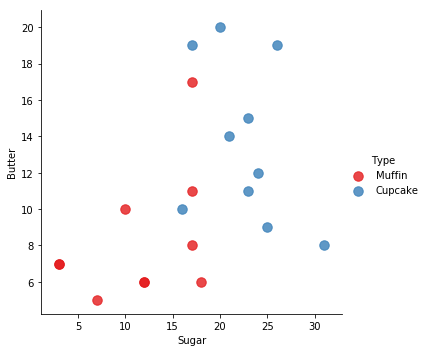

In [4]:
sns.lmplot('Sugar','Butter',data=data,hue='Type',palette='Set1',fit_reg=False,scatter_kws={'s':90})

In [5]:
sugar_butter = data[['Sugar','Butter']].as_matrix()
label = pd.get_dummies(data['Type'],drop_first=True)

C:\Users\Brogrammer_Vinay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [6]:
sugar_butter

array([[ 3,  7],
       [12,  6],
       [18,  6],
       [17, 17],
       [12,  6],
       [ 3,  7],
       [ 7,  5],
       [10, 10],
       [17,  8],
       [17, 11],
       [26, 19],
       [16, 10],
       [20, 20],
       [17, 19],
       [23, 15],
       [25,  9],
       [21, 14],
       [31,  8],
       [24, 12],
       [23, 11]], dtype=int64)

In [7]:
new_data = pd.concat([data,label],axis=1)

In [8]:
new_data.drop('Type',axis=1,inplace=True)

In [9]:
y = label.as_matrix()

C:\Users\Brogrammer_Vinay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [10]:
sugar = new_data[['Sugar','Butter']]

In [11]:
model = svm.SVC(kernel='linear',C=1.0)
model.fit(sugar,y.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

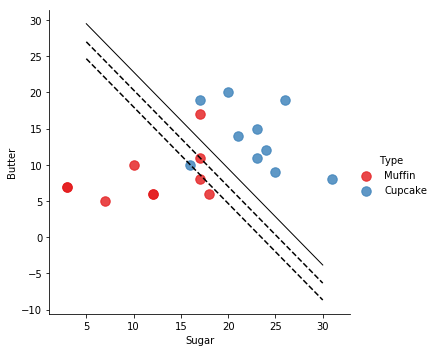

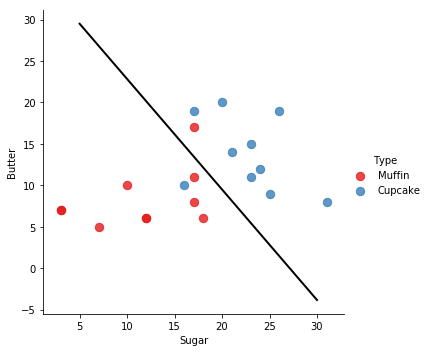

In [32]:
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(5,30)
yy  = a*xx - (model.intercept_[0]) / w[1]

b = model.support_vectors_[0]
yy_down = a*xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])


sns.lmplot('Sugar','Butter',data=data,hue='Type',palette='Set1',fit_reg=False,scatter_kws={'s':90})
plt.plot(xx,yy, linewidth=1, color='black')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=80, facecolors='none')

sns.lmplot('Sugar','Butter',data=data,hue='Type',palette='Set1',fit_reg=False,scatter_kws={'s':70})
plt.plot(xx,yy,linewidth=2,color='black')

In [79]:
value = [[21,13]]
prediction = model.predict(value)

In [80]:
prediction

array([0], dtype=uint8)

In [60]:
new_data.head()

,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt,Muffin
0,55,28,3,7,5,2,0,0,1
1,47,24,12,6,9,1,0,0,1
2,47,23,18,6,4,1,0,0,1
3,45,11,17,17,8,1,0,0,1
4,50,25,12,6,5,2,1,0,1


In [34]:
from sklearn.linear_model import LogisticRegression

C:\Users\Brogrammer_Vinay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


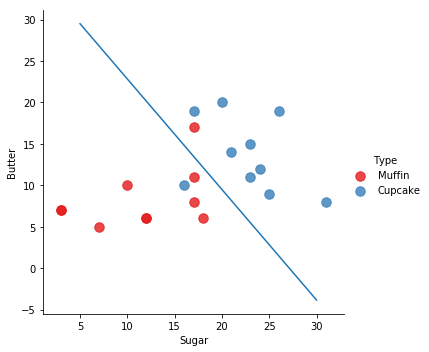

In [35]:
logit = LogisticRegression()
logit.fit(sugar,y.ravel())

logit.predict([[21,13]])
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(5,30)
yy  = a*xx - (model.intercept_[0]) / w[1]
sns.lmplot('Sugar','Butter',data=data,hue='Type',palette='Set1',fit_reg=False,scatter_kws={'s':90})
plt.plot(xx,yy,'-')

In [43]:
model.coef_

array([[-0.24243891, -0.18182918]])

In [41]:
model.intercept_[0]

6.576175530591105

In [20]:
model.support_vectors_[0]

array([16., 10.])

In [21]:
model.support_vectors_[-1]

array([17., 11.])

In [22]:
model.support_vectors_[1]

array([17., 19.])